# Test 01 (Midterm Exam): Unsupervised Learning (Linear Regression, Logistic Classification, SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 8) # set default figure size, 8in by 6in

**Due: Sunday  10/20 (by midnight)**

Please add your name and last 5 digits of your CWID to this markdown cell for my reference.

    Name: Shruthi Madishetty

    CWID: 50239178


## Artificial Cubic Data Set

For the first part of this exam you will be performing a linear regression on an artificial data set.  
We will start by creating a function that generates an artificial data set that is really a cubic function,
but that also adds in noise to each data point to make it more difficult to fit a machine learning model
to the artificially generated data set.  

In the [scikit-learn generators](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
library there are many functions to generate artificial data sets, including one to make a random
regression data set.  You should not use this, as in this test you are to write your own data
set generator as described next.

This function will generate data using a polynomial of the for

\begin{equation}
y = ax^3 + bx^2 +cx + d + \text{gaussian_noise(mu, sigma)}
\end{equation}

$a, b, c, d$ are all parameters of the polynomial.  We will use the `numpy.random.normal` function
to add noise with a mean of mu and standard deviation of sigma to each generated data point.

Write a function named `make_cubic_dataset()`.  The function signature is given below, you just need
to write it.  The function takes only 1 required parameter, `m`, which is the number of random
samples to generate.  Parameters a, b, c and d specify the cubic polynomial function, and defaults are
given for an interesting function in the range of $x$ from -1.0 to 1.0.  Also mu and sigma are parameters
that control the amount of noise added to the randomly created data, where mu is 0, but we add 
a standard deviation of 0.2 of gaussian noise to each generated sample point.

Your function should return two `NumPy` arrays named `x` and `y`.  `x` is simply an array with `m` values
in it, which are randomly selected values in the range from -1.0 to 1.0.  `y` then is the result
of applying the cubic function to each value of x, and then adding in the indicated random amount
of gaussian noise.  

To generate random `x` values, use the `numpy.random.rand()` function, which will return values in the
range [0.0, 1.0] and simply multiply by 2 and subtract 1 (vectorized), to get values in the range
[-1.0, 1.0].  Once you have your `x` values, you can use vectorized operations to generate y using the cubic polynomial.
Don't forget to add in the indicated noise as well.  For `numpy.random.normal()` you can use the location
and scale parameters to specify the mean and standard deviation of the noise, and you also want to use the
size parameter so that you can generate `m` samples of random noise to add to the artificial data.

You have been given the function signature below.  Default values are given for the cubic polynomial that
you will use for this test question

\begin{equation}
y = -3x^3 + 1x^2 + 3.5x + 4
\end{equation}

And likewise you should use a default `mu` of 0.0 and `sigma` of 0.33 to generate your gaussian noise to be added
to the artificially sampled data.

In [3]:
def make_cubic_dataset(m, a=-3.0, b=1.0, c=3.5, d=4, mu=0.0, sigma=0.33):
    """Make a randomly generated artifical cubic regression data set.  We generate and return 2 arrays,
    the x samples, and the y regression targets.  x values are sampled randomly in the interval from
    [0.0, 10.0].  The y regression is a cubic polynomial function of the form y = ax^3 + bx^2 + cx + d
    In addition, random gaussian noise is added to each sampled point with mean of mu, and standard deviation
    of sigma
    
    Parameters
    ----------
    m - Number of random samples to artificially generate (an integer value >= 1)
    a, b, c, d - terms of the cubic polynomial used to generate the random data set
    mu, sigma - terms controlling the amount of random noise added to each artifically sampled point, where
      mu is the mean of the gaussian noise to generate and sigma is the standard deviation of the noise to
      be generated and added to the samples.
    
    Returns
    -------
    x - A NumPy array of shape (m,) (a vector).  The m samples are all in the range from [0.0, 10.0]
    y - A NumPy array of shape (m,) (a vector).  The regression targets generated by the underlying cubic
        function plus some added noise
    """
    # step 1, generate m random values for the x independent feature, in the range [-1.0, 1.0]
    x = np.random.rand(100,)*2 - 1
    
    # step 2, generate y from the described cubic function and the a,b,c,d parameters
    y = a*(x**3) + b*(x**2) + c*x + d 
    
    # step 3, generate m samples of gaussian noise with a mean of mu and a standard deviation of sigma
    noise = np.random.normal(mu, sigma, m)
    y += noise
    # step 4, return the x,y (independent variable, dependent variable) random sample pairs
    return x,y

If you run the cell below and your function is implemented correctly, you should get x and y arrays both of shape (100,)
and the first 5 values should be exactly as shown here (since we set the seed to 42), assuming you use the suggested
`rand()` and `normal()` functions to generate the random x values and the random gaussian noise to add to the
sampled data.

```python
np.random.seed(42)
x,y = make_cubic_dataset(100)

print(x.shape)
>>> (100,)

print(y.shape)
>>> (100,)

print(x[:5])
>>> [-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]

print(y[:5])
>>> [3.26086136 5.67147014 5.56985485 4.05059863 2.96975467]
```

In [4]:
# set the random seed to a know value (42 here), so that you get the same results as what I show you
# should get when generating your random data set
np.random.seed(42)

# call your function to generate the artificial cubic data set
x,y = make_cubic_dataset(100)

print(x.shape)
print(y.shape)
print(x[:5])
print(y[:5])

(100,)
(100,)
[-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]
[3.26086136 5.67147014 5.56985485 4.05059863 2.96975467]


In the next cell make a scatter plot of your data.  For example, if you use lmplot from the seaborn
plotting library to get a best fit linear
regression line against your cubic data with random noise, you should see something like the following (but
feel free to just use a regular matplotlib plot):

![Scatter plot of artificial cubic data set](
cubic-data-set.png)

For your own understanding, you should also generate your data set where the mu and sigma for the noise are both
set to 0.  In that case you can better see the exact cubic funciton underlying the relationship between the
independent and dependent variable we are working with here.

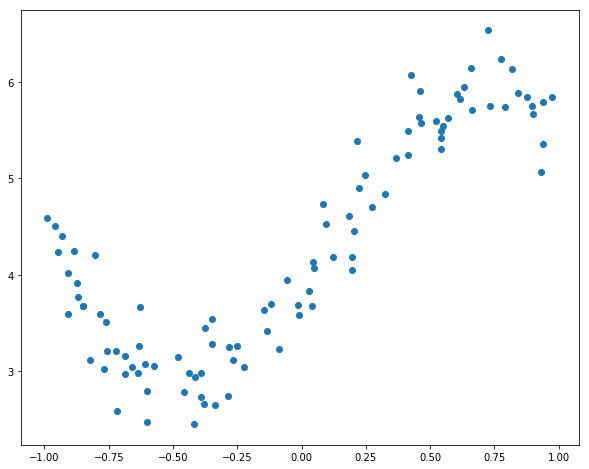

In [5]:
# create scatter plot of the cubic dataset here
plt.scatter(x, y)

## Fit a Linear Regression 

In the next cell(s) find a best fit linear regression (line) to the artificial cubic data.  You can choose which library
or method to fit your data (scikit-learn, statsmodel, np.polyfit).  But do report and do the following:

1. Report the intercept and slope coefficients of your fitted line.  Whatever method you use, you should get the following slope and intercept values:
2. Make a plot of your noisy data with your fitted line.  Do not use sns.lmplot again, use the slope and intercept
coefficient parameters to put the fitted line onto a scatter plot of the noisy data.
3. Find and report the $R^2$ measure, which is the goodness of the linear regression fit to the given data.

(100, 1)


4.35748502535137

array([1.56479492])

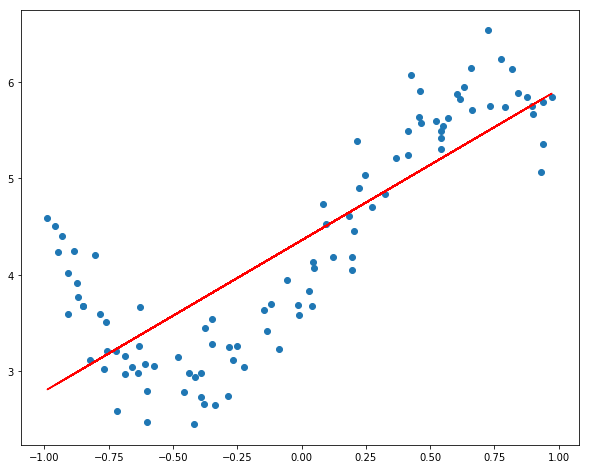

0.656431397391207

In [6]:
# create and fit a model from one of the libraries that supports finding a best-fit linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

X = x[:, np.newaxis]
print(X.shape)
model = LinearRegression()
model.fit(X,y)
# 1. report the slope and intercept coefficients of the fitted line
display(model.intercept_)
display(model.coef_)
y_pred = model.predict(X)

# 2. Make a scatter plot of the noisy data along with the fitted line given by the slope/intercept fitted parameters
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()

# 3. Find and report the R^2 fit measure of your fitted model
model.score(X, y)

## Fit a 3rd order Regression

In a previous lecture we did show one example of using the `scikit-learn` `PolynomialFeatures`
function to create polynomial features (see Lecture 07).

As you know this artificial function is actually a cubic function with some random noise in
the data mapping x to the dependent variable y.  If we knew or suspected this was a cubic
funciton, we could fit a cubic funciton to the data and see how good our fit is.

For example, here I will just show you the result of using `np.polyfit` to fit a 3rd order (cubic)
polynomial to our noisy data.

```python
theta = np.polyfit(x, y, 3) # fit a degree 3 (cubic) polynomial to the data

# 1. report the intercept and slope
print(theta)
>>> [-3.15173418  1.18723786  3.52544514  3.92884488]
```

In [7]:
# this assumes that you created and named the arrays x and y for your feature matrix and label matrix above
theta = np.polyfit(x, y, 3) # fit a degree 3 (cubic) polynomial to the data

# 1. report the intercept and slope
print(theta)

[-3.15173418  1.18723786  3.52544514  3.92884488]


The highest order (3rd power or cubic) term is the first one, down to the lowest order (the intercept) term from
the `polyfit` function.  Thus this result corresponds to a fitted function of:

\begin{equation}
y = -3.15 x^3  + 1.18 x ^2 + 3.52 x + 3.92
\end{equation}

You should compare that to the actual function we used to generate the function, which was once again:

\begin{equation}
y = -3x^3 + 1x^2 + 3.5x + 4
\end{equation}

The fit will not be perfect because of the noise, but you can see that it does a pretty good job.

Usually however you don't know the shape or order of the underlying function that controls your data.
In the next cell(s) you need to try and use the `PolynomialFeatures` function from `scikit-learn` to generate
all combinations of features up to the 4th order.  Fit a `scikit-learn` `LinearRegression` instance to this
expanded set of features, and report the coefficients.

```python
# The shape should be (100,4) after transforming to add the higher order polynomial features, and the first 5
# samples should look like the following
print(X_4d.shape)
>>> (100, 4)

print(X_4d[:5,:])
>>> [[-0.25091976  0.06296073 -0.01579809  0.00396405]
     [ 0.90142861  0.81257354  0.73247704  0.66027576]
     [ 0.46398788  0.21528476  0.09988952  0.04634753]
     [ 0.19731697  0.03893399  0.00768234  0.00151586]
     [-0.68796272  0.4732927  -0.32560773  0.22400598]]
```

In [8]:
# first of all, import PolynomialFeatures function from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# and use it to generate a new X_4d array that has all features up to 4th order features
poly_degree = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
print(poly_degree)
X_4d = poly_degree.fit_transform(x.reshape(-1,1))

model_1 = LinearRegression()

# The shape should be (100,4) after transforming to add the higher order polynomial features, and the first 5
# samples should look like the following
print(X_4d.shape)
print(X_4d[:5,:])

PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
(100, 4)
[[-0.25091976  0.06296073 -0.01579809  0.00396405]
 [ 0.90142861  0.81257354  0.73247704  0.66027576]
 [ 0.46398788  0.21528476  0.09988952  0.04634753]
 [ 0.19731697  0.03893399  0.00768234  0.00151586]
 [-0.68796272  0.4732927  -0.32560773  0.22400598]]


The default is to just add the simple $x^2, x^3, x^4$ terms, and to add the dummy intercept column of 1's, thus
you expect the shape to be (100,5) after adding/transforming the 4th degree polynomial features. You should also
use the option to not include a bias term as, once again, this is added/included again automatically by
the `scikit-learn` regressor to determine the intercept.

Given this set of features, use `scikit-learn` `LinearRegression` object to fit a regressor to this expanded set of
features, and report the coefficients you end up finding for your fit.

In [9]:
# fit a new linear regression to the expanded feature matrix
poly_degree = PolynomialFeatures(degree=4, include_bias=False)
print(poly_degree)
X_4d = poly_degree.fit_transform(x.reshape(-1,1))

model_2 = LinearRegression()
model_2.fit(X_4d, y)

# 1. report the intercept and slope
display(model_2.intercept_)
display(model_2.coef_)

PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)


3.890442409957512

array([ 3.53344263,  1.55246698, -3.16335354, -0.42592931])

Here you should see that intercept corresponds to the bias or intercept term.  The coefficients are arranged
in the reverse order, from the lowest to the highest, so the coefficient at index 0 is the $x^1$ term, and the
last coefficient returned from the model is the $x^4$ term.  You should find that the $x^4$ term is the smallest,
but it is not 0, even though we know the actual function is a cubic.  This is because, again, the noise we
add makes it impossible to recover the original function governing this data.

We can plot this hypothesized fit to the original noisy data using the `predict()` method of the 
`scikit-learn` fitted instance.  In the next cell, create a scatter plot of the original noisy data,
then use the `predict()` function to show the fitted quadratic polynomial to the data.

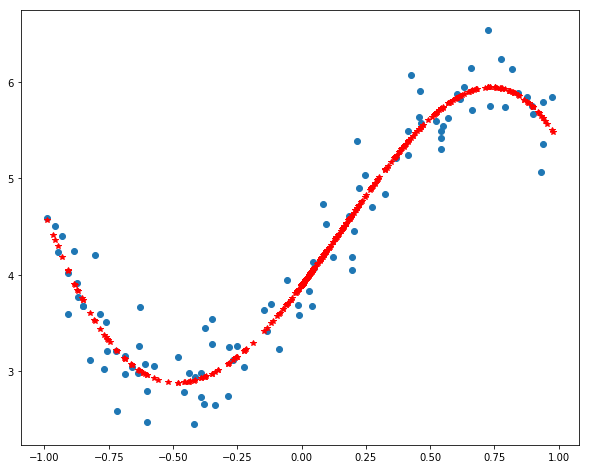

In [10]:
# create scatter plot here
plt.scatter(x, y)

# plot your fitted 4th order polynomial as a line on the scatter plot

y_pred = model_2.predict(X_4d)
a = model_2.coef_[0]
b = model_2.coef_[1]
c = model_2.coef_[2]
d = model_2.coef_[3]

hypothesis =  a * X_4d + b * (X_4d**2) + c * (X_4d ** 3) + d * (X_4d ** 4) + model_2.intercept_
#plt.plot(X_4d, y_pred, 'r-')
plt.plot(X_4d, hypothesis,'r*')
plt.show()



**Extra Credit Opportunity**: We already found out the $R^2$ fit score for the linear fit to this noisy cubic
data.  You can also easily find the $R^2$ score of your 4th order fit to the data from your `scikit-learn`
regression model.  A good exercise is to also fit a order 2 (quadratic) and order 3 (cubic) function to the data, as
well as a 5th order polynomial as well.  Do that and gathre the $R^2$ fit scores for all of the fits from linear
(order 1) up to order 5, and compare them.  A plot of the order vs. the $R^2$ score is a good way to compare them.
You will probably find that the $R^2$ score reaches a maximum at the order 3 cubic fit.  It will not go down
for higher order fits, as they can over fit, but it general because of the noise the fit won't get any better
either.  This is another way to determine the order of the fit that best works for your data.  When you example
$R^2$ for different models, you want the simplest model that has similarly best fit scores.


In [11]:
# Extra creditpoly_degree = PolynomialFeatures(degree=4, include_bias=False)
poly_degree2 = PolynomialFeatures(degree=2, include_bias=False)
poly_degree3 = PolynomialFeatures(degree=3, include_bias=False)
Y = y[:, np.newaxis]

X_2d = poly_degree2.fit_transform(x.reshape(-1,1))
model2d = LinearRegression()
model2d.fit(X_2d, y)
y2_pred = model2d.predict(X_2d)

X_3d = poly_degree3.fit_transform(x.reshape(-1,1))
model3d = LinearRegression()
model3d.fit(X_3d, Y)
y3_pred = model3d.predict(X_3d)

#Degree 2 R2
print(model2d.score(X_2d, y))

#Degree 3 R2
print(model3d.score(X_3d, y))
#r2_score(X, y2_pred)

#Degree 4 R2 
print(model_2.score(X_4d, y))

0.7656981859920756
0.9356508204501137
0.9363944224260331


# Logistic Classification

In this section you will generate another artificial data set that contains 4 labels/classes.  This time, however,
we will use one of the `scikit-learn` dataset generator methods to generate the data set for us.  You will
then fit a logistic regression classifier to the data (and we will also use the same data to fit an SVM
classifier as well to it for comparison).  

## Artifical Multiclass Dataset

As mentioned previously there are many functions in the `sklearn.datasets` that can be used to 
[generate artificial datasets](https://scikit-learn.org/stable/datasets/index.html#generated-datasets)
in order to test out various machine learning methods.  The simplest one for generating
labeled datasets suitable for classification tasks is the `make_blobs` dataset generator.

In the next cell, import `make_blobs` and generate an artificial dataset with 4 categories or
labels.  You will need to read the documentation for the function to determine the parameters
you need.  Make a dataset with 500 samples and 2 features.  You will need to specify 4 as the
number of centers of the generated blobs, in order to generate data with 4 categories.  Use
a cluster standard deviation of 3.0.  The random seed has been reset to 42 in the cell before where
you should call `make_blobs`, so that you will get the same results when you generate you multiclass
dataset.

In [12]:
# import the make_blobs function, and make sure we reset the random seed to 42 so
# that you get the expected results when generating your dataset
from sklearn.datasets.samples_generator import make_blobs

np.random.seed(42)

In [13]:
# generate your multiclass dataset with 4 classes.  There should be 500 samples in the dataset with 2
# input features. Use a standard deviation of 3.0 for the cluster centers
X, y = make_blobs(n_samples=500, centers=4, n_features=2, cluster_std=3.0)

If you correctly create your dataset, then you should have an X feature matrix of size (500,2) and a
y label vector with (500,) labels.  The labels will be the values [0 1 2 3] for this artificial
multiclass dataset.  The first few items of the X inputs and the Y labels should be as shown:

```python
print(X.shape)
>>> (500, 2)

print(y.shape)
>>> (500,)

print(np.unique(y))
>>> [0 1 2 3]

print(X[:5])
>>> [[ -5.39050778   5.21399364]
     [-14.97028712  -7.04299419]
     [ 11.20928764  -0.45172517]
     [ -3.68552208   4.62374128]
     [ -3.27598542  -8.10433571]]

print(y[:5])
>>> [3 2 1 0 2]

```

In [14]:
print(X.shape)
print(y.shape)
print(np.unique(y))

print(X[:5])
print(y[:5])

(500, 2)
(500,)
[0 1 2 3]
[[ -5.39050778   5.21399364]
 [-14.97028712  -7.04299419]
 [ 11.20928764  -0.45172517]
 [ -3.68552208   4.62374128]
 [ -3.27598542  -8.10433571]]
[3 2 1 0 2]


In the next cell create a scatter plot of the artifical data set and use markers or colors to indicate
the classes of the 4 data points.  You can use similar methods as we have shown previously in class lecture
notebooks, but you need to extend the concept to display the 4 categories.

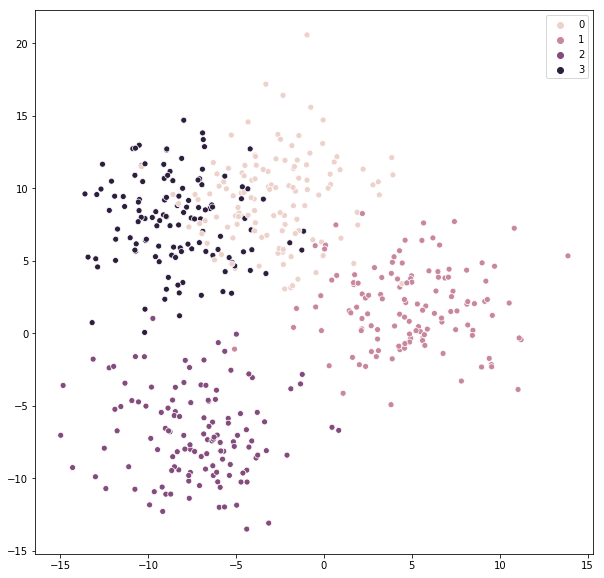

In [15]:
# create a scatter plot of the artificial multiclass dataset
f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(10,10))

sns.scatterplot(X[:,0], X[:,1], hue=y, ax=ax1)

Also for this classification you are going to evaluate the goodness of the model fit by doing a train/test
split and evaluating the classification performance on the test data.  In the next cell, create X_train, X_test,
y_train and y_test arrays from your artificial multiclass dataset, using a 75%/25% train/test split.  You should
use the `scikit-learn` methods for splitting the data here that we have shown examples of and used in previous
assignments and lectures.  Use a random_state of 42 to make sure that you split the data in the same way
every time.

If you use a 75/25 split, you should end up with 375 samples in the training data, and 125 in the testing data:

```python
print(X_train.shape)
>>> (375, 2)

print(X_test.shape)
>>> (125, 2)

print(y_train.shape)
>>> (375,)

print(y_test.shape)
>>> (125,)
```

In [16]:
# perform a 75/25 percent train/test split of the artificial multiclass data here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


## Fit a Multiclass Logistic Classifier

In this section you should fit/train a multiclass logistic regression instance using `scikit-learn`
`LogisticRegression` on your training data.  I will not tell you the exact parameters to use.
Try and see in the next part if you can tweak the parameters to get good performance on the
test data.  Try comparing using multi_class='multinomial' vs. multi_class='ovr' (one vs. rest).

In the next cell, fit your model to the training data only.

In [17]:
# Create a LinearRegression instance and 
# fit a Linear Regression classification to the training data 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


ovr_regr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr_regr.fit(X_train, y_train)
pred1 = ovr_regr.predict(X_test)
print("OVR Training Accuracy is : {}".format(ovr_regr.score(X_train, y_train)))
print("OVR Testing Accuracy is : {}".format(ovr_regr.score(X_test, y_test)))
#print(ovr_regr.predict(X_train))


multinomial_regr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
multinomial_regr.fit(X_train, y_train)
pred2 = multinomial_regr.predict(X_test)
print("Multinomial Training Accuracy is : {}".format(multinomial_regr.score(X_train, y_train)))
print("Multinomial Testing Accuracy is : {}".format(multinomial_regr.score(X_test, y_test)))

OVR Training Accuracy is : 0.9146666666666666
OVR Testing Accuracy is : 0.88
Multinomial Training Accuracy is : 0.912
Multinomial Testing Accuracy is : 0.896


Using the model you just fit, show the predictation accuracy on the training data, and then on the
held back test data, for your fitted model. (**Hint**: recall the score method for
`scikit-learn` model instances)

In [18]:
# show the prediction accuracy on the training data
X_pred = multinomial_regr.predict(X_train)
m = X_train.shape[0]
#accuracy =  # np.sum( (X_pred == y_train) / m)
print(accuracy_score(X_pred,y_train))

0.912


In [19]:
# now show the predictation accuracy for your model on the held back test data
print(multinomial_regr.score(X_test, y_test))

0.896


You should be able to get an accuracy of about 0.91 on the training data, and 0.89 on the test data most of the
time if your regression is fitting correctly.


**Extra Credit**: This section is also optional, but try and visualize the decision boundary, if you have time,
of your fitted logistic classifier here.  Since this is a multiclass classifier, it is somewhat difficult to find the
decision boundary lines for each of the individual classifiers being used.  So the easiest approach is to use
the `predict()` method form a mesh/grid of prediction values covering the 2 features, and make a contour plot
of the resulting areas. I have given examples of doing this before, but again you would need to expand this
for the multiclass case of 4 classes here.  You should see that, since this is a basic logistic regression, 
linear decision boundaries are being fitted by the model as best they can to make the classification decisions
for the fitted model.

Put your visualization in the next cell of the fitted decision boundaries of your classifier.

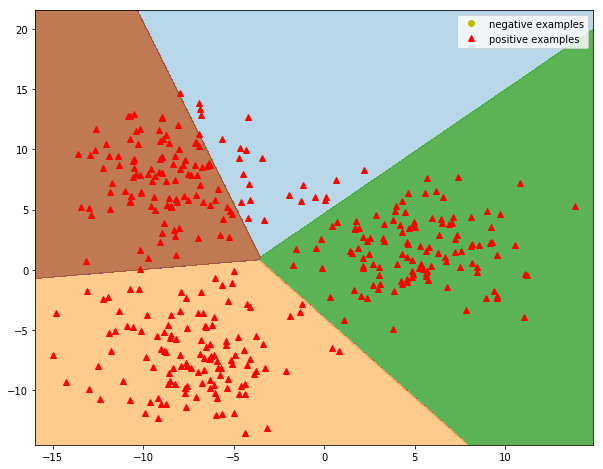

In [20]:
# extra credit
x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = multinomial_regr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# plot the original data
neg_indexes = np.where(Y<0)[0]
pos_indexes = np.where(y>0)[0]
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'yo', label='negative examples')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r^', label='positive examples')
plt.legend();


# Support Vector Machine

As a final task, you will create a SVM classifier on the same artificial multiclass data in this section.

## Fit SVM using a RBF (gaussian) Kernel

Fit a SVM classifier to the training data of your artificial dataset here.  Use a Gaussian RBF (radial basis function)
kernel, as we have done before, which are basically Gaussian kernels as described in the class videos in our
Lecture 07 notebooks.

In the next cell, create an instance of your SVM and fit it to the training data.  Again I won't tell you all of the
parameters.  You might want to try changing the g parameter (controlling the width of the gaussian similarity measure)
and the C parameter (controlling the amount of regularization that will be applied to the model).

It is relatively easy to get 100% accuracy on the training data (try making gamma large).  However, accuracy
on the test data can probably only reacy maybe 92% accuracy if you balance things as best you can here.

In [21]:
# import the SVC (support vector machine classifier) from sklearn
from sklearn import svm

# create an instance using an rbf (gaussian) kernel, and train it on the training data
rbfclf = svm.SVC(kernel='rbf', gamma=1.91)
rbfclf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.91, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that you have a trained model, again show your accuracy in the next cells on the original training data, and then
show the accuracy on the held back test data.

In [22]:
# show prediction accuracy score on the training data
pred4 = rbfclf.predict(X_train)
print(accuracy_score(y_train, pred4))

0.9706666666666667


In [23]:
# show prediction accuracy score on the held back test data
pred5 = rbfclf.predict(X_test)
print(accuracy_score(y_test, pred5))

0.856


**Extra Credit**: As before try plotting the decision boundary found by your best SVM classifier for a bit of
extra credit. 

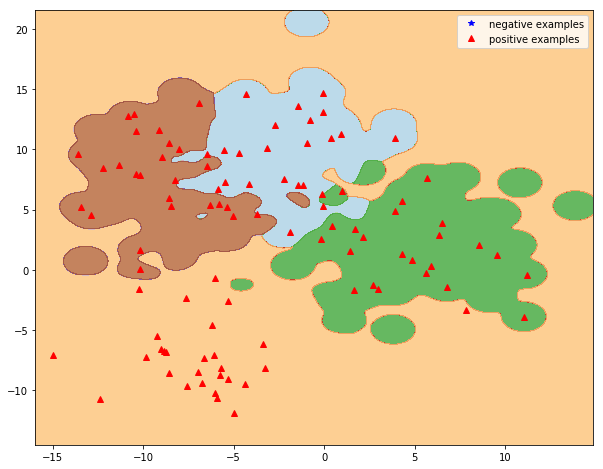

In [24]:
# extra credit
X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(y_min, y_max, h))

Z = rbfclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.75)

# plot the original data
neg_indexes = np.where(Y<0)[0]
pos_indexes = np.where(Y>0)[0]
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'b*', label='negative examples')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r^', label='positive examples')
plt.legend();